In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

In [3]:
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

X_train = X_train.reshape(-1, 28, 28)

X_test = test.values
X_test = X_test.reshape(-1, 28, 28)

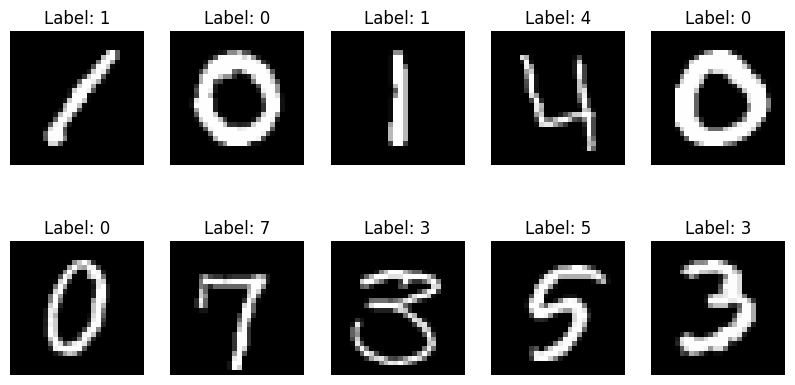

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [5]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (42000, 784)
Flattened test data shape: (28000, 784)


In [6]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (33600, 784)
Validation set shape: (8400, 784)


KNN Validation Accuracy: 0.9687
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       816
           1       0.97      1.00      0.98       909
           2       0.98      0.95      0.97       846
           3       0.97      0.96      0.96       937
           4       0.98      0.97      0.97       839
           5       0.96      0.96      0.96       702
           6       0.98      0.99      0.98       785
           7       0.96      0.97      0.96       893
           8       0.98      0.94      0.96       835
           9       0.94      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



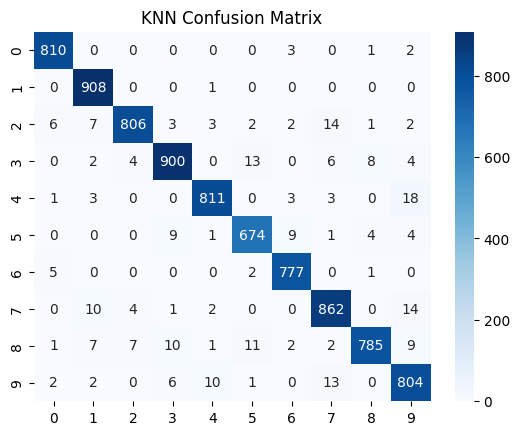

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

knn_report = classification_report(y_val, y_val_pred_knn, output_dict=True)
knn_precision = knn_report['macro avg']['precision']
knn_recall = knn_report['macro avg']['recall']
knn_f1 = knn_report['macro avg']['f1-score']

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9320
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       816
           1       0.96      0.98      0.97       909
           2       0.91      0.93      0.92       846
           3       0.91      0.91      0.91       937
           4       0.93      0.95      0.94       839
           5       0.90      0.90      0.90       702
           6       0.96      0.95      0.95       785
           7       0.95      0.93      0.94       893
           8       0.92      0.89      0.90       835
           9       0.94      0.91      0.92       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



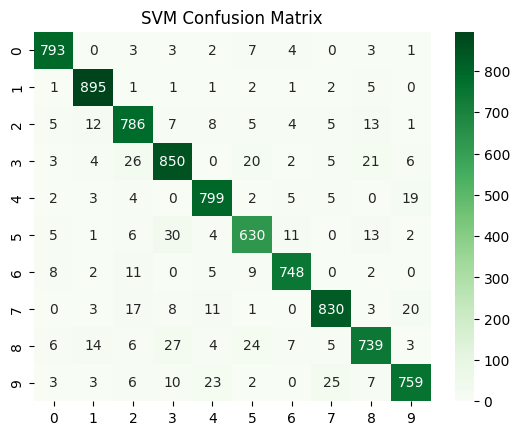

In [8]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

svm_report = classification_report(y_val, y_val_pred_svm, output_dict=True)
svm_precision = svm_report['macro avg']['precision']
svm_recall = svm_report['macro avg']['recall']
svm_f1 = svm_report['macro avg']['f1-score']

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [9]:
results = []
results.append({
    'Model': 'KNN',
    'Accuracy': knn_acc,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1-Score': knn_f1
})
results.append({
    'Model': 'SVM',
    'Accuracy': svm_acc,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1-Score': svm_f1
})
results_df = pd.DataFrame(results)
print(results_df)

  Model  Accuracy  Precision    Recall  F1-Score
0   KNN  0.968690   0.968860  0.968616  0.968620
1   SVM  0.932024   0.931641  0.931548  0.931484
